## To identify the Terrorist Organization based on the Terrorism Incident Info.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
SEED = 42

### Loading the Data
Loading Global Terrorism Dataset from CSV file

In [3]:
# Load the dataset
df_bl = pd.read_csv("baseline_data.csv")

### Step 1: Initlal EDA & Data Preparation

In [4]:
df_bl.head(10)

,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,...,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
0,1.998020e+11,1998,2,6,0,186,6,6.941837,79.861687,1,...,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0
1,1.998030e+11,1998,3,5,0,186,6,6.941837,79.861687,1,...,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0
2,1.998030e+11,1998,3,9,0,186,6,7.775413,81.606247,1,...,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0
3,1.998030e+11,1998,3,9,0,186,6,8.577826,81.218719,1,...,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0
4,1.998050e+11,1998,5,17,0,186,6,9.666399,80.020477,1,...,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0
5,1.998070e+11,1998,7,27,0,186,6,6.941837,79.861687,1,...,NaN,NaN,NaN,NaN,NaN,NaN,0,1,1,1
6,1.999060e+11,1999,6,1,0,186,6,8.964041,80.787941,1,...,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0
7,1.999070e+11,1999,7,5,0,186,6,8.665596,80.296238,1,...,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0
8,1.999070e+11,1999,7,5,0,186,6,8.973818,80.527176,1,...,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0
9,1.999070e+11,1999,7,25,0,186,6,8.577826,81.218719,1,...,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0


In [5]:
df_bl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12295 entries, 0 to 12294
Data columns (total 62 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   eventid         12295 non-null  float64
 1   iyear           12295 non-null  int64  
 2   imonth          12295 non-null  int64  
 3   iday            12295 non-null  int64  
 4   extended        12295 non-null  int64  
 5   country         12295 non-null  int64  
 6   region          12295 non-null  int64  
 7   latitude        12295 non-null  float64
 8   longitude       12295 non-null  float64
 9   specificity     12295 non-null  int64  
 10  vicinity        12295 non-null  int64  
 11  crit1           12295 non-null  int64  
 12  crit2           12295 non-null  int64  
 13  crit3           12295 non-null  int64  
 14  multiple        12295 non-null  int64  
 15  success         12295 non-null  int64  
 16  suicide         12295 non-null  int64  
 17  attacktype1     12295 non-null 

In [6]:
#pick relevant features
baseline_features = ['country','region','latitude','longitude','success','suicide','attacktype1','targtype1','targsubtype1','natlty1','individual','nperps','claimed','weaptype1','weapsubtype1','nkill','nkillus','nkillter','nwound','nwoundus','nwoundte','property','ishostkid','INT_LOG','INT_IDEO','INT_MISC','INT_ANY']

In [7]:
df_bl[baseline_features].head(10)

,country,region,latitude,longitude,success,suicide,attacktype1,targtype1,targsubtype1,natlty1,...,nkillter,nwound,nwoundus,nwoundte,property,ishostkid,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
0,186,6,6.941837,79.861687,1,1,3,4,36,186.0,...,1,15,0,0,0,0,0,0,0,0
1,186,6,6.941837,79.861687,1,1,3,19,99,186.0,...,1,260,0,0,1,0,0,0,0,0
2,186,6,7.775413,81.606247,1,0,3,14,73,186.0,...,0,30,0,0,1,0,0,0,0,0
3,186,6,8.577826,81.218719,1,0,3,3,22,186.0,...,0,5,0,0,1,0,0,0,0,0
4,186,6,9.666399,80.020477,1,0,1,2,18,186.0,...,0,0,0,0,0,0,0,0,0,0
5,186,6,6.941837,79.861687,0,0,3,7,46,999.0,...,0,0,0,0,0,0,0,1,1,1
6,186,6,8.964041,80.787941,1,0,2,14,67,186.0,...,0,6,0,0,0,0,0,0,0,0
7,186,6,8.665596,80.296238,1,0,3,16,90,186.0,...,0,0,0,0,1,0,0,0,0,0
8,186,6,8.973818,80.527176,1,0,3,3,25,186.0,...,0,3,0,0,1,0,0,0,0,0
9,186,6,8.577826,81.218719,1,1,3,11,58,186.0,...,2,0,0,0,1,0,0,0,0,0


In [7]:
df_bl[baseline_features].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12295 entries, 0 to 12294
Data columns (total 27 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   country       12295 non-null  int64  
 1   region        12295 non-null  int64  
 2   latitude      12295 non-null  float64
 3   longitude     12295 non-null  float64
 4   success       12295 non-null  int64  
 5   suicide       12295 non-null  int64  
 6   attacktype1   12295 non-null  int64  
 7   targtype1     12295 non-null  int64  
 8   targsubtype1  12295 non-null  int64  
 9   natlty1       12290 non-null  float64
 10  individual    12295 non-null  int64  
 11  nperps        11986 non-null  float64
 12  claimed       12295 non-null  int64  
 13  weaptype1     12295 non-null  int64  
 14  weapsubtype1  10765 non-null  float64
 15  nkill         12295 non-null  int64  
 16  nkillus       12295 non-null  int64  
 17  nkillter      12295 non-null  int64  
 18  nwound        12295 non-nu

#### Mapping Labels

In [8]:
#Check unique gname(Terrorist Organization) values
df_bl[['gname']].nunique()

gname    21
dtype: int64

In [9]:
df_bl[['gname']].gname.unique()

array(['Liberation Tigers of Tamil Eelam (LTTE)', 'Al-Qaida',
       'Sympathizers of Al-Qaida Organization', 'Taliban',
       'Al-Qaida in Iraq', 'Al-Qaida in Saudi Arabia',
       'Al-Qaida in the Arabian Peninsula (AQAP)',
       'Islambouli Brigades of al-Qaida', 'Taliban (Pakistan)',
       'Al-Qaida Organization for Jihad in Sweden',
       'Houthi extremists (Ansar Allah)',
       'Al-Qaida in the Islamic Maghreb (AQIM)',
       'Jadid Al-Qaida Bangladesh (JAQB)',
       'Al-Qaida Kurdish Battalions (AQKB)', 'Al-Qaida in Yemen',
       'Tehrik-i-Taliban Pakistan (TTP)', 'Al-Shabaab', 'Boko Haram',
       'Al-Nusrah Front', 'Fulani extremists',
       'Islamic State of Iraq and the Levant (ISIL)'], dtype=object)

In [10]:
# Update gname(Terrorist Organization) column to numerical
df_bl['gname'] = df_bl['gname'].map({'Islamic State of Iraq and the Levant (ISIL)':0,'Taliban':1,'Taliban (Pakistan)':1,'Boko Haram':2,'Al-Qaida':3,'Al-Qaida in Iraq':3,'Al-Qaida in Saudi Arabia':3,'Al-Qaida in the Arabian Peninsula (AQAP)':3,'Al-Qaida in the Islamic Maghreb (AQIM)':3,'Al-Qaida in Yemen':3,'Al-Qaida Kurdish Battalions (AQKB)':3,'Al-Shabaab':4,'Tehrik-i-Taliban Pakistan (TTP)':5,'Al-Nusrah Front':6,'Fulani extremists':7,'Houthi extremists (Ansar Allah)':8,'Liberation Tigers of Tamil Eelam (LTTE)':9, 'Sympathizers of Al-Qaida Organization':3,'Islambouli Brigades of al-Qaida':3, 'Al-Qaida Organization for Jihad in Sweden':3,'Jadid Al-Qaida Bangladesh (JAQB)':3,'':0})

In [11]:
df_bl[['gname']].nunique()

gname    10
dtype: int64

In [12]:
df_bl[['gname']].gname.unique()

array([9, 3, 1, 8, 5, 4, 2, 6, 7, 0], dtype=int64)

In [13]:
df_bl[['gname']]

,gname
0,9
1,9
2,9
3,9
4,9
...,...
12290,0
12291,0
12292,4
12293,1


### Step 2: EDA & Data Preprocessing
#### Remove NA

In [14]:
#check for null cells
print(df_bl[baseline_features].isna().any().any())
df_bl[baseline_features].isna().any()

True


country         False
region          False
latitude        False
longitude       False
success         False
suicide         False
attacktype1     False
targtype1       False
targsubtype1    False
natlty1          True
individual      False
nperps           True
claimed         False
weaptype1       False
weapsubtype1     True
nkill           False
nkillus         False
nkillter        False
nwound          False
nwoundus        False
nwoundte        False
property        False
ishostkid       False
INT_LOG         False
INT_IDEO        False
INT_MISC        False
INT_ANY         False
dtype: bool

In [15]:
# count the number of missing data for each feature
df_bl_na = df_bl[baseline_features].isna().sum()
df_bl_na

country            0
region             0
latitude           0
longitude          0
success            0
suicide            0
attacktype1        0
targtype1          0
targsubtype1       0
natlty1            5
individual         0
nperps           309
claimed            0
weaptype1          0
weapsubtype1    1530
nkill              0
nkillus            0
nkillter           0
nwound             0
nwoundus           0
nwoundte           0
property           0
ishostkid          0
INT_LOG            0
INT_IDEO           0
INT_MISC           0
INT_ANY            0
dtype: int64

In [16]:
#remove null rows in 'natlty1','nperps'
df_bl.dropna(axis=0, subset=['natlty1','nperps'],inplace=True)

In [17]:
df_bl[baseline_features].isna().sum()

country            0
region             0
latitude           0
longitude          0
success            0
suicide            0
attacktype1        0
targtype1          0
targsubtype1       0
natlty1            0
individual         0
nperps             0
claimed            0
weaptype1          0
weapsubtype1    1490
nkill              0
nkillus            0
nkillter           0
nwound             0
nwoundus           0
nwoundte           0
property           0
ishostkid          0
INT_LOG            0
INT_IDEO           0
INT_MISC           0
INT_ANY            0
dtype: int64

In [18]:
#check unique value in 'weapsubtype1'
df_bl[['weapsubtype1']].nunique()

weapsubtype1    27
dtype: int64

In [19]:
sorted(df_bl[['weapsubtype1']].weapsubtype1.unique())

[1.0,
 2.0,
 3.0,
 4.0,
 5.0,
 7.0,
 8.0,
 9.0,
 11.0,
 12.0,
 13.0,
 17.0,
 nan,
 10.0,
 14.0,
 15.0,
 16.0,
 18.0,
 19.0,
 20.0,
 21.0,
 22.0,
 23.0,
 24.0,
 27.0,
 28.0,
 29.0,
 30.0]

In [20]:
# Fill the nan values in the 'weapsubtype1' column
df_bl['weapsubtype1'].fillna(value=0,inplace=True)

In [21]:
df_bl[baseline_features].isna().sum()

country         0
region          0
latitude        0
longitude       0
success         0
suicide         0
attacktype1     0
targtype1       0
targsubtype1    0
natlty1         0
individual      0
nperps          0
claimed         0
weaptype1       0
weapsubtype1    0
nkill           0
nkillus         0
nkillter        0
nwound          0
nwoundus        0
nwoundte        0
property        0
ishostkid       0
INT_LOG         0
INT_IDEO        0
INT_MISC        0
INT_ANY         0
dtype: int64

In [22]:
# Get an overall sense of the data shape with the mean/median, min, max, q1, q3 values
with pd.option_context('display.max_columns', 40):
    print(df_bl[baseline_features+['gname']].describe(include='all'))

            country        region      latitude     longitude       success  \
count  11981.000000  11981.000000  11981.000000  11981.000000  11981.000000   
mean      92.088390      8.530423     26.987020     50.177554      0.910024   
std       77.077053      2.171375     11.888881     18.318604      0.286159   
min        4.000000      1.000000    -33.934491    -83.047924      0.000000   
25%        4.000000      6.000000     14.753635     43.295662      1.000000   
50%       95.000000     10.000000     33.303566     45.068171      1.000000   
75%      153.000000     10.000000     34.799654     66.901016      1.000000   
max      603.000000     12.000000     59.402479    151.179691      1.000000   

            suicide   attacktype1    targtype1  targsubtype1       natlty1  \
count  11981.000000  11981.000000  11981.00000  11981.000000  11981.000000   
mean       0.149570      3.515483      8.58501     49.285535     99.835239   
std        0.356664      2.144301      5.98821     28.

In [23]:
df_bl[baseline_features+['gname']].describe(include='all')

,country,region,latitude,longitude,success,suicide,attacktype1,targtype1,targsubtype1,natlty1,...,nwound,nwoundus,nwoundte,property,ishostkid,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,gname
count,11981.000000,11981.000000,11981.000000,11981.000000,11981.000000,11981.000000,11981.000000,11981.00000,11981.000000,11981.000000,...,11981.000000,11981.000000,11981.000000,11981.000000,11981.000000,11981.000000,11981.000000,11981.000000,11981.000000,11981.000000
mean,92.088390,8.530423,26.987020,50.177554,0.910024,0.149570,3.515483,8.58501,49.285535,99.835239,...,5.865704,0.006093,0.421000,-1.254152,0.055922,-0.095067,0.223521,0.045823,0.225106,2.027293
std,77.077053,2.171375,11.888881,18.318604,0.286159,0.356664,2.144301,5.98821,28.638481,92.775898,...,20.900997,0.167610,2.763168,3.714555,0.600677,1.172968,1.285901,0.209109,1.283317,2.268093
min,4.000000,1.000000,-33.934491,-83.047924,0.000000,0.000000,1.000000,1.00000,1.000000,4.000000,...,0.000000,0.000000,0.000000,-9.000000,-9.000000,-9.000000,-9.000000,0.000000,-9.000000,0.000000
25%,4.000000,6.000000,14.753635,43.295662,1.000000,0.000000,2.000000,3.00000,23.000000,4.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,95.000000,10.000000,33.303566,45.068171,1.000000,0.000000,3.000000,8.00000,48.000000,95.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,153.000000,10.000000,34.799654,66.901016,1.000000,0.000000,3.000000,14.00000,75.000000,153.000000,...,5.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,3.000000
max,603.000000,12.000000,59.402479,151.179691,1.000000,1.000000,9.000000,22.00000,113.000000,999.000000,...,1500.000000,10.000000,100.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,9.000000


In [24]:
# limit to categorical data using df.select_dtypes()
df_bl_cat = df_bl[baseline_features+['gname']].select_dtypes(include=['object'])
df_bl_cat.nunique()

Series([], dtype: float64)

In [25]:
# limit to numerical data using df.select_dtypes()
df_bl_num = df_bl[baseline_features+['gname']].select_dtypes(include=['number'])
df_bl_num.nunique()

country           44
region             8
latitude        4983
longitude       4913
success            2
suicide            2
attacktype1        9
targtype1         20
targsubtype1     102
natlty1           69
individual         1
nperps            52
claimed            3
weaptype1          9
weapsubtype1      28
nkill            104
nkillus            8
nkillter          55
nwound           136
nwoundus           9
nwoundte          37
property           3
ishostkid          3
INT_LOG            3
INT_IDEO           3
INT_MISC           2
INT_ANY            3
gname             10
dtype: int64

In [26]:
# look at correlations in the numerical independent variables, as well as the dependent variable
df_bl[baseline_features+['gname']].corr()

,country,region,latitude,longitude,success,suicide,attacktype1,targtype1,targsubtype1,natlty1,...,nwound,nwoundus,nwoundte,property,ishostkid,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,gname
country,1.000000,0.698504,-0.596591,-0.512714,0.014015,0.034538,-0.064791,0.218229,0.214980,0.778075,...,0.058456,-0.014095,-0.142847,-0.072325,0.039891,-0.074826,0.003368,0.056619,0.004061,0.586674
region,0.698504,1.000000,-0.550007,-0.843707,0.024557,0.067632,-0.016527,0.266058,0.250041,0.536921,...,0.021597,-0.031128,-0.143860,-0.084706,0.027367,-0.105460,0.040285,-0.007942,0.040813,0.164331
latitude,-0.596591,-0.550007,1.000000,0.452690,-0.015303,0.022068,0.080118,-0.052135,-0.050821,-0.502686,...,0.035066,0.025433,0.080407,0.008392,-0.019572,0.156500,0.239280,-0.045002,0.238936,-0.616052
longitude,-0.512714,-0.843707,0.452690,1.000000,-0.035794,-0.093788,0.003451,-0.270234,-0.253919,-0.385075,...,-0.037479,-0.020201,0.116759,0.043231,-0.015119,0.240635,0.152955,-0.007079,0.152073,-0.110497
success,0.014015,0.024557,-0.015303,-0.035794,1.000000,-0.025978,-0.058265,0.051812,0.047269,0.031046,...,0.062457,0.007950,-0.040344,-0.043974,0.032189,-0.030957,-0.024736,0.036822,-0.024397,0.005713
suicide,0.034538,0.067632,0.022068,-0.093788,-0.025978,1.000000,-0.112062,-0.098385,-0.088795,0.072349,...,0.254345,0.074118,-0.048230,-0.052708,-0.028135,0.058533,0.095633,0.081575,0.095307,-0.085739
attacktype1,-0.064791,-0.016527,0.080118,0.003451,-0.058265,-0.112062,1.000000,0.089944,0.095083,-0.051012,...,-0.042734,-0.006185,0.035064,0.013211,0.085002,0.034320,0.051056,0.027365,0.051013,-0.080333
targtype1,0.218229,0.266058,-0.052135,-0.270234,0.051812,-0.098385,0.089944,1.000000,0.979864,0.151242,...,0.014825,-0.018272,-0.063628,-0.025104,0.055116,-0.087319,-0.024007,-0.042208,-0.024459,0.050573
targsubtype1,0.214980,0.250041,-0.050821,-0.253919,0.047269,-0.088795,0.095083,0.979864,1.000000,0.162623,...,0.012227,-0.013214,-0.058809,-0.014302,0.053248,-0.082140,-0.018894,-0.023901,-0.019328,0.053648
natlty1,0.778075,0.536921,-0.502686,-0.385075,0.031046,0.072349,-0.051012,0.151242,0.162623,1.000000,...,0.030944,0.111922,-0.129070,-0.059023,0.040803,-0.048827,0.054181,0.428089,0.053798,0.489741


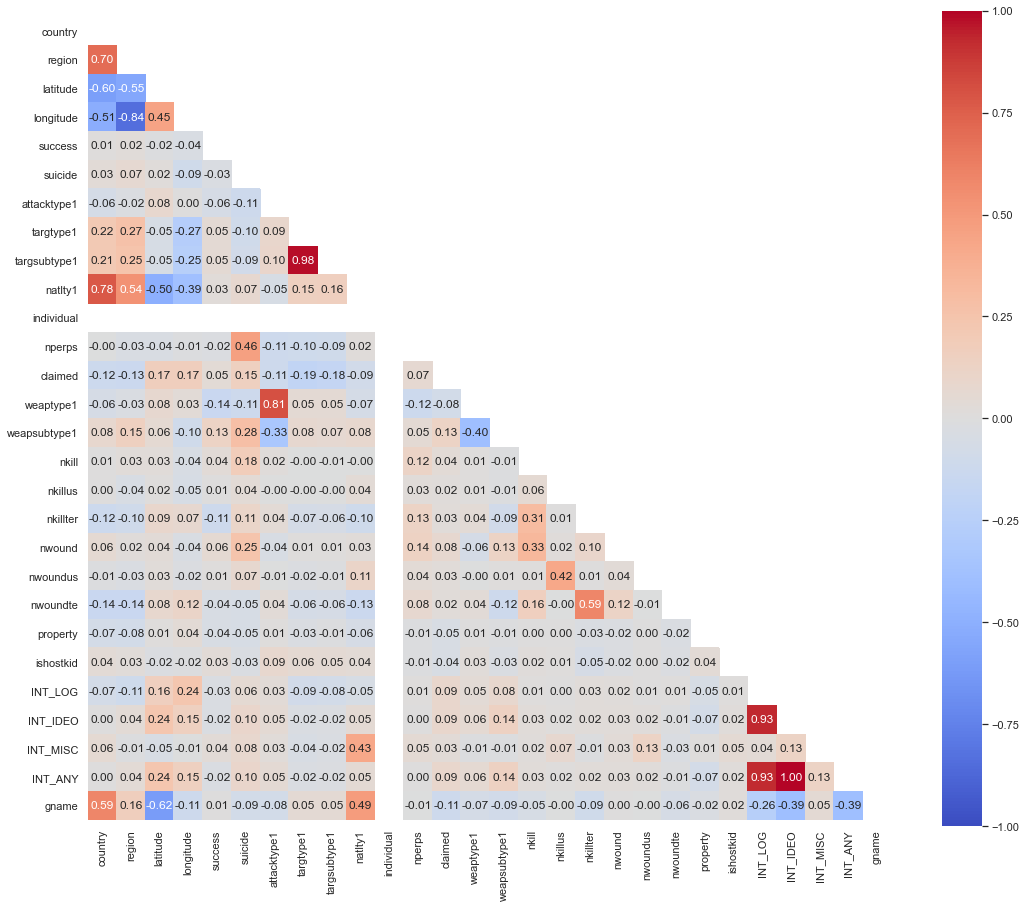

In [115]:
# correlation matrix heatmap visualization
sns.set(style="white")

# Generate a mask for the upper triangle
matrix = np.triu(df_bl[baseline_features+['gname']].corr())

# Set up the matplotlib figure to control size of heatmap
fig, ax = plt.subplots(figsize=(18,15))

# Plot the heatmap
_ = sns.heatmap(df_bl[baseline_features+['gname']].corr(), mask=matrix, annot=True, annot_kws={"size": 12}, square=True, 
                cmap='coolwarm' , vmin=-1, vmax=1, fmt='.2f') 

In [27]:
# As this is a classification project, we will check whether the target (dependent variable) is imbalanced
df_bl['gname'].value_counts()

1    4192
0    3181
4    1180
2     939
3     829
5     646
8     566
7     206
6     122
9     120
Name: gname, dtype: int64

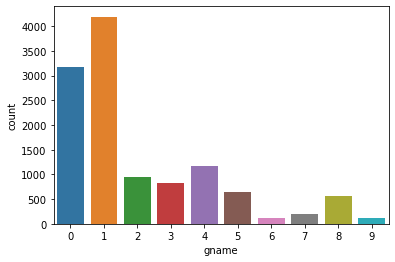

In [28]:
# To visualize how well balanced the target (dependent variable) is
_ = sns.countplot(x=df_bl['gname'])

#### Checking Outliers & Skewness

In [29]:
df_bl[baseline_features+['gname']].groupby(by='gname').count().sort_values('gname', ascending=True)

,country,region,latitude,longitude,success,suicide,attacktype1,targtype1,targsubtype1,natlty1,...,nkillter,nwound,nwoundus,nwoundte,property,ishostkid,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
gname,,,,,,,,,,,,,,,,,,,,,
0,3181,3181,3181,3181,3181,3181,3181,3181,3181,3181,...,3181,3181,3181,3181,3181,3181,3181,3181,3181,3181
1,4192,4192,4192,4192,4192,4192,4192,4192,4192,4192,...,4192,4192,4192,4192,4192,4192,4192,4192,4192,4192
2,939,939,939,939,939,939,939,939,939,939,...,939,939,939,939,939,939,939,939,939,939
3,829,829,829,829,829,829,829,829,829,829,...,829,829,829,829,829,829,829,829,829,829
4,1180,1180,1180,1180,1180,1180,1180,1180,1180,1180,...,1180,1180,1180,1180,1180,1180,1180,1180,1180,1180
5,646,646,646,646,646,646,646,646,646,646,...,646,646,646,646,646,646,646,646,646,646
6,122,122,122,122,122,122,122,122,122,122,...,122,122,122,122,122,122,122,122,122,122
7,206,206,206,206,206,206,206,206,206,206,...,206,206,206,206,206,206,206,206,206,206
8,566,566,566,566,566,566,566,566,566,566,...,566,566,566,566,566,566,566,566,566,566


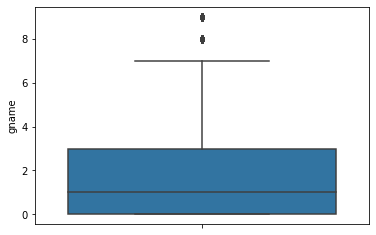

In [30]:
# Boxplot using Seaborn
_ = sns.boxplot(y='gname', data=df_bl[baseline_features+['gname']])

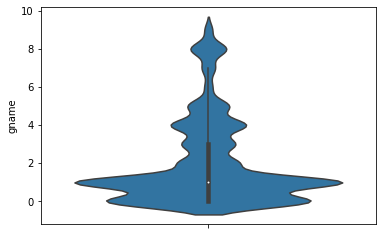

In [31]:
# Violin plot using Seaborn
_ = sns.violinplot(y='gname',data=df_bl[baseline_features+['gname']])

#### Check individual features against labels
#### 0.gname vs. country

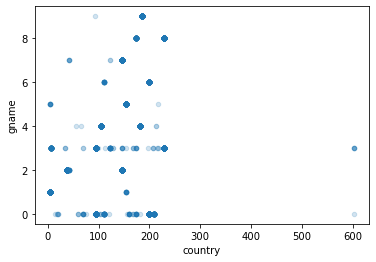

In [32]:
_ = df_bl[baseline_features+['gname']].plot.scatter(baseline_features[0], 'gname',alpha=0.2)

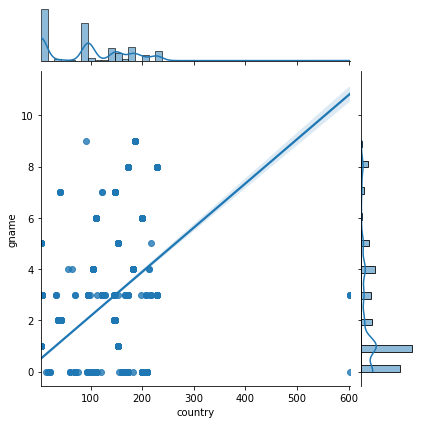

In [33]:
# visualize the correlation between an independent variable and the dependent variable
_ = sns.jointplot(x=baseline_features[0], y='gname', data=df_bl[baseline_features+['gname']], kind="reg")

In [34]:
df_bl[baseline_features[0]].value_counts(sort=True)

4      4189
95     3107
182     999
147     970
228     823
153     649
200     395
104     178
37      120
186     119
173      89
6        67
209      61
110      53
146      38
123      29
42       16
160      11
69       11
167       6
603       6
41        5
208       4
217       3
33        3
102       3
21        3
60        3
18        2
94        2
128       2
113       2
213       2
65        1
215       1
121       1
75        1
99        1
155       1
92        1
93        1
14        1
198       1
56        1
Name: country, dtype: int64

#### 1.gname vs. region

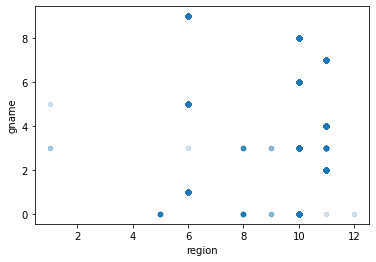

In [35]:
_ = df_bl[baseline_features+['gname']].plot.scatter(baseline_features[1], 'gname',alpha=0.2)

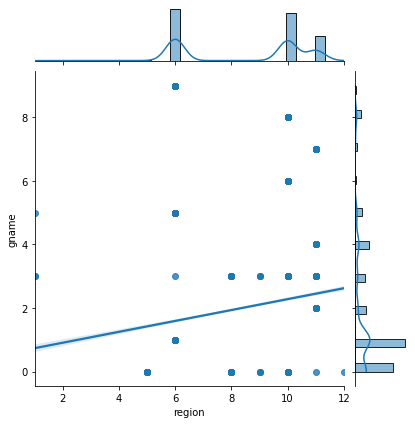

In [36]:
# visualize the correlation between an independent variable and the dependent variable
_ = sns.jointplot(x=baseline_features[1], y='gname', data=df_bl[baseline_features+['gname']], kind="reg")

In [37]:
df_bl[baseline_features[1]].value_counts(sort=True)

6     4958
10    4613
11    2365
8       22
5       13
9        6
1        3
12       1
Name: region, dtype: int64

#### 2.gname vs. latitude

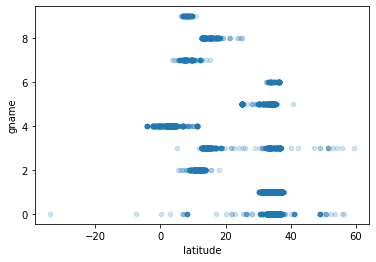

In [38]:
_ = df_bl[baseline_features+['gname']].plot.scatter(baseline_features[2], 'gname',alpha=0.2)

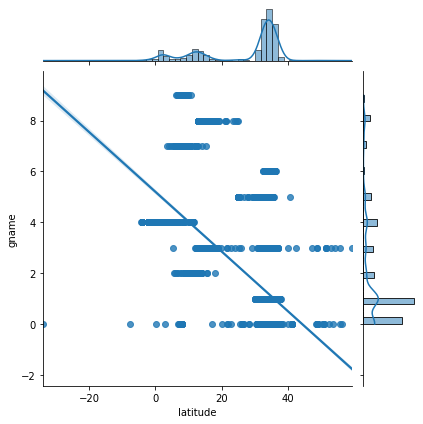

In [39]:
# visualize the correlation between an independent variable and the dependent variable
_ = sns.jointplot(x=baseline_features[2], y='gname', data=df_bl[baseline_features+['gname']], kind="reg")

In [40]:
df_bl[baseline_features[2]].value_counts(sort=True)

33.303566    594
2.059819     429
36.354145    399
34.516895    177
13.586484    174
            ... 
34.835294      1
36.094574      1
33.910318      1
35.166361      1
34.000000      1
Name: latitude, Length: 4983, dtype: int64

#### 3.gname vs. longitude

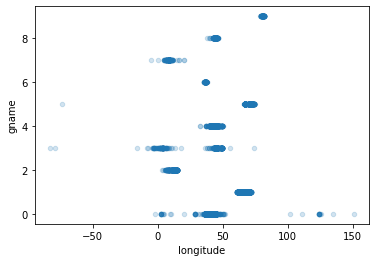

In [41]:
_ = df_bl[baseline_features+['gname']].plot.scatter(baseline_features[3], 'gname',alpha=0.2)

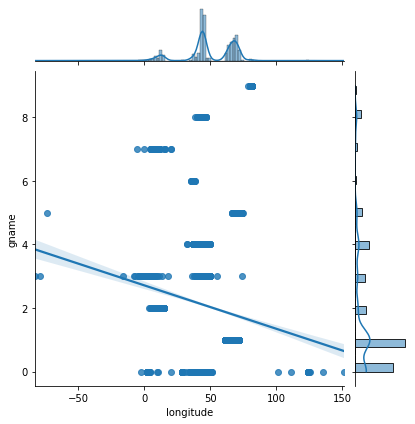

In [42]:
# visualize the correlation between an independent variable and the dependent variable
_ = sns.jointplot(x=baseline_features[3], y='gname', data=df_bl[baseline_features+['gname']], kind="reg")

In [43]:
df_bl[baseline_features[3]].value_counts(sort=True)

44.371773    594
45.326115    429
43.143570    399
69.147011    177
44.024105    174
            ... 
64.417054      1
13.410980      1
68.761631      1
66.221964      1
49.000000      1
Name: longitude, Length: 4913, dtype: int64

### latitude x longitude

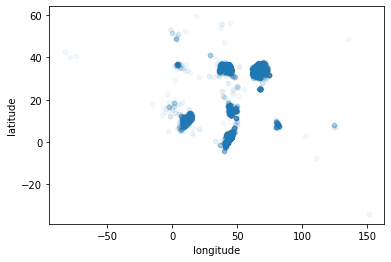

In [45]:
_ = df_bl[baseline_features+['gname']].plot.scatter(baseline_features[3],baseline_features[2],alpha=0.05)

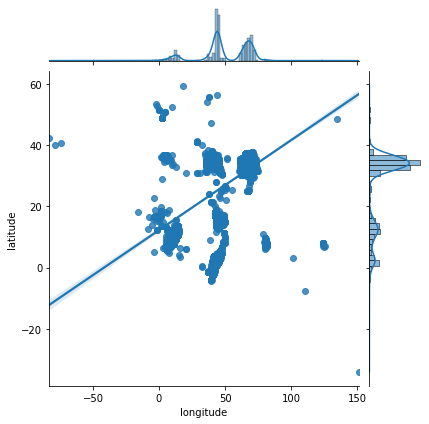

In [46]:
# visualize the correlation between an independent variable and the dependent variable
_ = sns.jointplot(x=baseline_features[3], y=baseline_features[2], data=df_bl[baseline_features+['gname']], kind="reg")

#### 4.gname vs. success

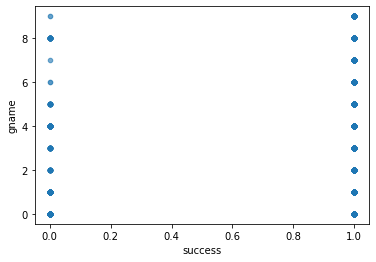

In [47]:
_ = df_bl[baseline_features+['gname']].plot.scatter(baseline_features[4], 'gname',alpha=0.2)

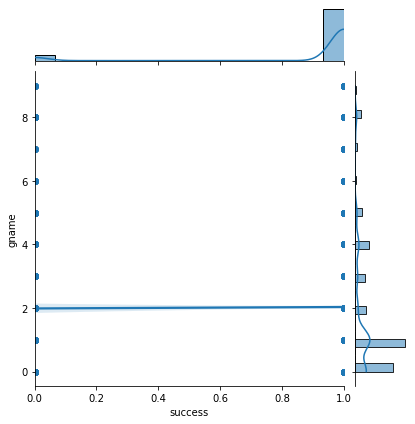

In [48]:
# visualize the correlation between an independent variable and the dependent variable
_ = sns.jointplot(x=baseline_features[4], y='gname', data=df_bl[baseline_features+['gname']], kind="reg")

In [49]:
df_bl[baseline_features[4]].value_counts(sort=True)

1    10903
0     1078
Name: success, dtype: int64

#### 5.gname vs. suicide

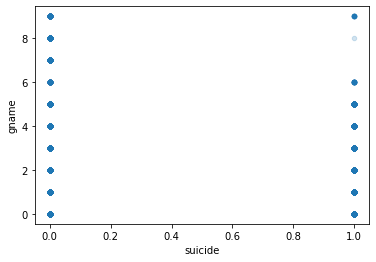

In [50]:
_ = df_bl[baseline_features+['gname']].plot.scatter(baseline_features[5], 'gname',alpha=0.2)

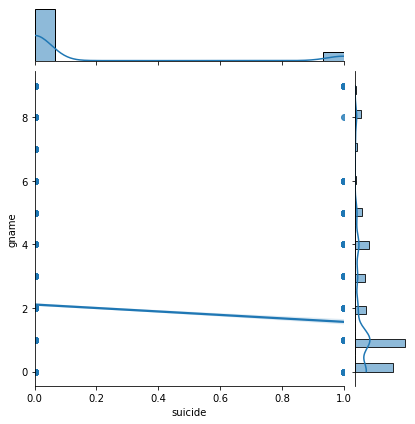

In [51]:
# visualize the correlation between an independent variable and the dependent variable
_ = sns.jointplot(x=baseline_features[5], y='gname', data=df_bl[baseline_features+['gname']], kind="reg")

In [52]:
df_bl[baseline_features[5]].value_counts(sort=True)

0    10189
1     1792
Name: suicide, dtype: int64

#### 6.gname vs. attacktype1

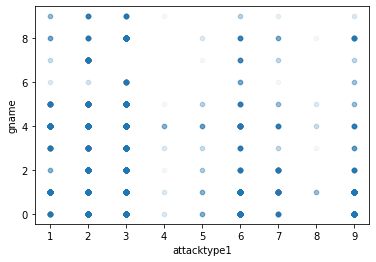

In [53]:
_ = df_bl[baseline_features+['gname']].plot.scatter(baseline_features[6], 'gname',alpha=0.05)

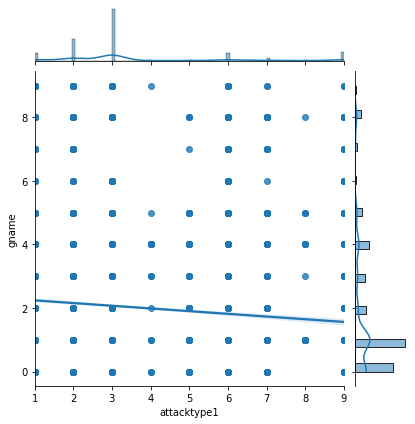

In [54]:
# visualize the correlation between an independent variable and the dependent variable
_ = sns.jointplot(x=baseline_features[6], y='gname', data=df_bl[baseline_features+['gname']], kind="reg")

In [55]:
df_bl[baseline_features[6]].value_counts(sort=True)

3    6061
2    2594
9    1042
1     920
6     895
7     349
5      73
4      26
8      21
Name: attacktype1, dtype: int64

#### 7.gname vs. targtype1

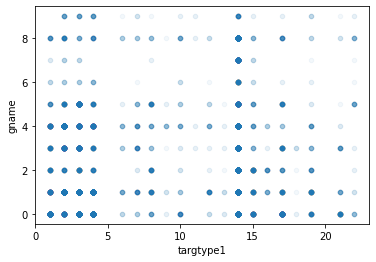

In [56]:
_ = df_bl[baseline_features+['gname']].plot.scatter(baseline_features[7], 'gname',alpha=0.05)

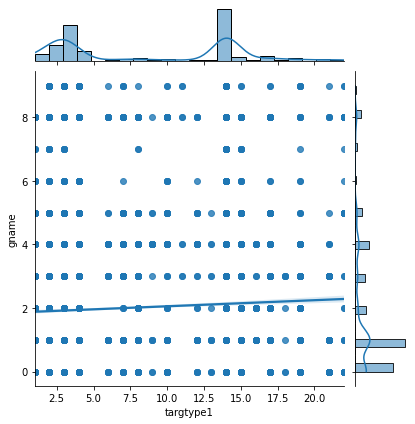

In [57]:
# visualize the correlation between an independent variable and the dependent variable
_ = sns.jointplot(x=baseline_features[7], y='gname', data=df_bl[baseline_features+['gname']], kind="reg")

In [58]:
df_bl[baseline_features[7]].value_counts(sort=True)

14    4444
3     3067
2     1327
4      828
1      581
17     392
15     319
8      202
19     191
7      127
21     114
10      97
12      75
22      57
6       55
16      52
9       22
13      14
18       9
11       8
Name: targtype1, dtype: int64

#### 8.gname vs. targsubtype1

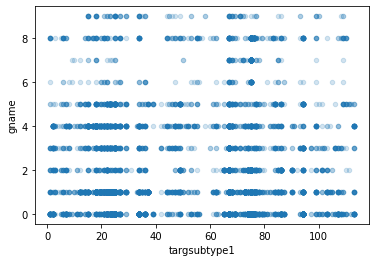

In [59]:
_ = df_bl[baseline_features+['gname']].plot.scatter(baseline_features[8], 'gname',alpha=0.2)

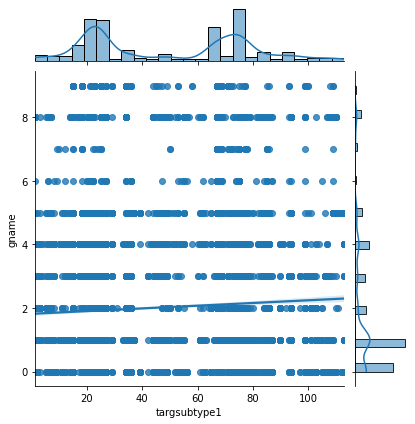

In [60]:
# visualize the correlation between an independent variable and the dependent variable
_ = sns.jointplot(x=baseline_features[8], y='gname', data=df_bl[baseline_features+['gname']], kind="reg")

In [61]:
df_bl[baseline_features[8]].value_counts(sort=True)

67    1304
75    1238
25    1046
22     837
24     607
      ... 
57       1
31       1
64       1
92       1
16       1
Name: targsubtype1, Length: 102, dtype: int64

#### 9.gname vs. natlty1

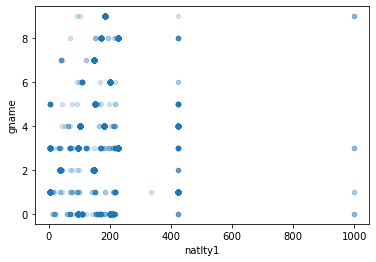

In [62]:
_ = df_bl[baseline_features+['gname']].plot.scatter(baseline_features[9], 'gname',alpha=0.2)

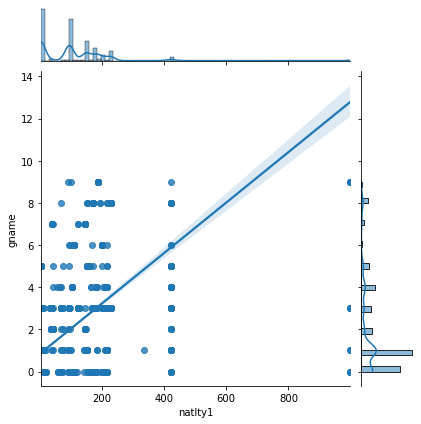

In [63]:
# visualize the correlation between an independent variable and the dependent variable
_ = sns.jointplot(x=baseline_features[9], y='gname', data=df_bl[baseline_features+['gname']], kind="reg")

In [64]:
df_bl[baseline_features[9]].value_counts(sort=True)

4.0      4027
95.0     3094
147.0     963
182.0     912
228.0     786
         ... 
19.0        1
113.0       1
149.0       1
161.0       1
121.0       1
Name: natlty1, Length: 69, dtype: int64

#### 10.gname vs. individual

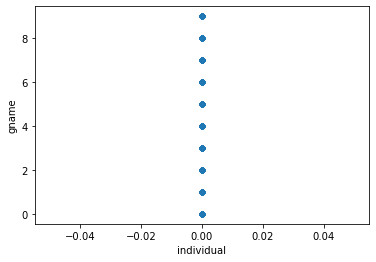

In [65]:
_ = df_bl[baseline_features+['gname']].plot.scatter(baseline_features[10], 'gname',alpha=0.2)

C:\Python\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


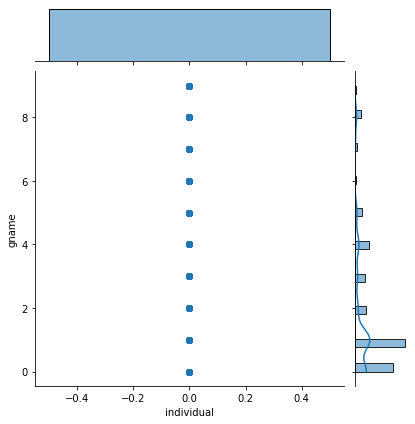

In [66]:
# visualize the correlation between an independent variable and the dependent variable
_ = sns.jointplot(x=baseline_features[10], y='gname', data=df_bl[baseline_features+['gname']], kind="reg")

In [67]:
df_bl[baseline_features[10]].value_counts(sort=True)

0    11981
Name: individual, dtype: int64

#### 11.gname vs. nperps

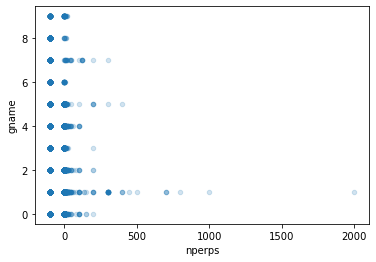

In [68]:
_ = df_bl[baseline_features+['gname']].plot.scatter(baseline_features[11], 'gname',alpha=0.2)

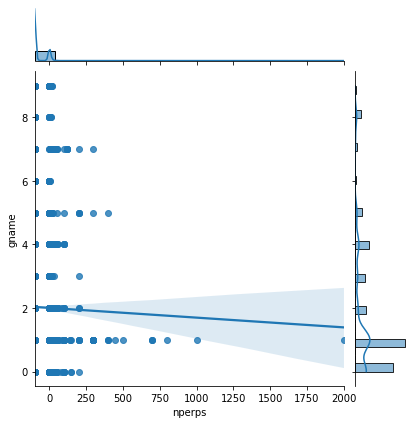

In [69]:
# visualize the correlation between an independent variable and the dependent variable
_ = sns.jointplot(x=baseline_features[11], y='gname', data=df_bl[baseline_features+['gname']], kind="reg")

In [70]:
df_bl[baseline_features[11]].value_counts(sort=True)

-99.0      9419
 1.0       1264
 2.0        429
 3.0        174
 4.0        139
 5.0         65
 6.0         61
 10.0        53
 7.0         48
 12.0        27
 8.0         24
 300.0       21
 50.0        20
 20.0        19
 9.0         17
 15.0        16
 100.0       16
 30.0        16
 22.0        14
 200.0       14
 24.0        11
 31.0        11
 40.0         9
 14.0         8
 101.0        8
 25.0         7
 13.0         6
 120.0        6
 16.0         5
 21.0         5
 11.0         5
 400.0        4
 0.0          4
 60.0         3
 47.0         3
 150.0        3
 80.0         3
 19.0         3
 700.0        3
 26.0         2
 32.0         2
 17.0         2
 140.0        2
 18.0         2
 36.0         1
 58.0         1
 450.0        1
 800.0        1
 1000.0       1
 2000.0       1
 41.0         1
 500.0        1
Name: nperps, dtype: int64

#### 12.gname vs. claimed

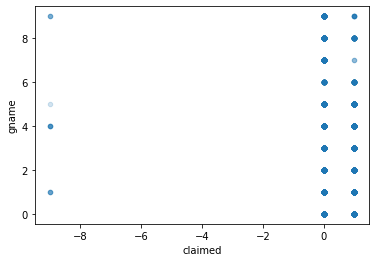

In [71]:
_ = df_bl[baseline_features+['gname']].plot.scatter(baseline_features[12], 'gname',alpha=0.2)

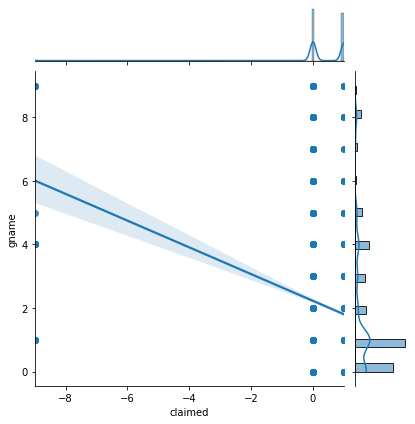

In [72]:
# visualize the correlation between an independent variable and the dependent variable
_ = sns.jointplot(x=baseline_features[12], y='gname', data=df_bl[baseline_features+['gname']], kind="reg")

In [73]:
df_bl[baseline_features[12]].value_counts(sort=True)

 0    6197
 1    5767
-9      17
Name: claimed, dtype: int64

#### 13.gname vs. weaptype1

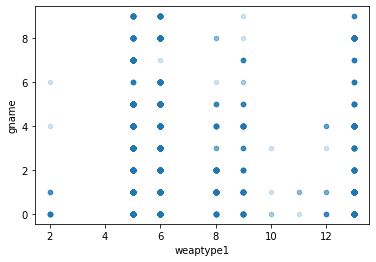

In [74]:
_ = df_bl[baseline_features+['gname']].plot.scatter(baseline_features[13], 'gname',alpha=0.2)

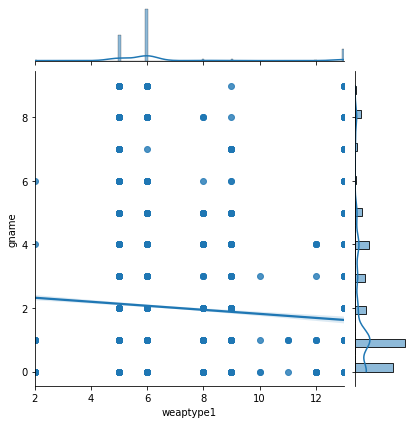

In [75]:
# visualize the correlation between an independent variable and the dependent variable
_ = sns.jointplot(x=baseline_features[13], y='gname', data=df_bl[baseline_features+['gname']], kind="reg")

In [76]:
df_bl[baseline_features[13]].value_counts(sort=True)

6     6699
5     3319
13    1453
8      257
9      195
2       31
12      19
11       4
10       4
Name: weaptype1, dtype: int64

#### 14.gname vs. weapsubtype1

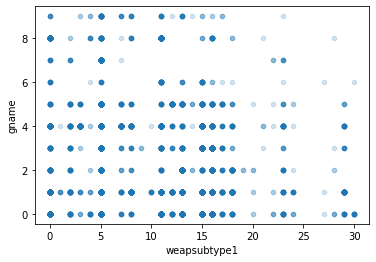

In [77]:
_ = df_bl[baseline_features+['gname']].plot.scatter(baseline_features[14], 'gname',alpha=0.2)

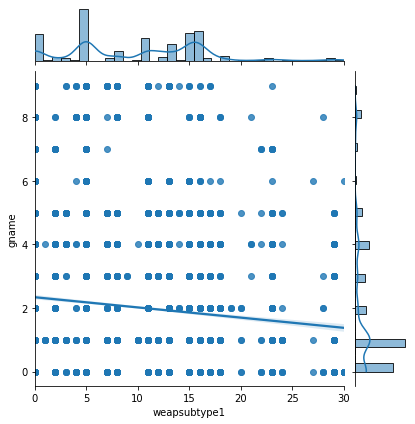

In [78]:
# visualize the correlation between an independent variable and the dependent variable
_ = sns.jointplot(x=baseline_features[14], y='gname', data=df_bl[baseline_features+['gname']], kind="reg")

In [79]:
df_bl[baseline_features[14]].value_counts(sort=True)

5.0     2932
16.0    1665
15.0    1590
0.0     1490
11.0    1302
13.0     927
8.0      548
18.0     245
2.0      211
12.0     191
7.0      175
23.0     145
17.0     140
3.0      131
29.0     126
4.0       45
24.0      23
30.0      22
10.0      15
22.0      11
14.0       9
1.0        8
20.0       8
28.0       8
21.0       5
19.0       3
9.0        3
27.0       3
Name: weapsubtype1, dtype: int64

#### 15.gname vs. nkill

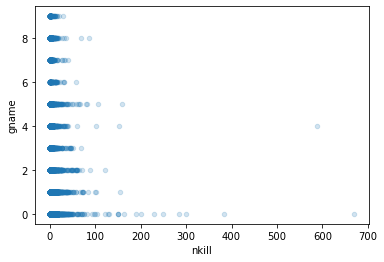

In [80]:
_ = df_bl[baseline_features+['gname']].plot.scatter(baseline_features[15], 'gname',alpha=0.2)

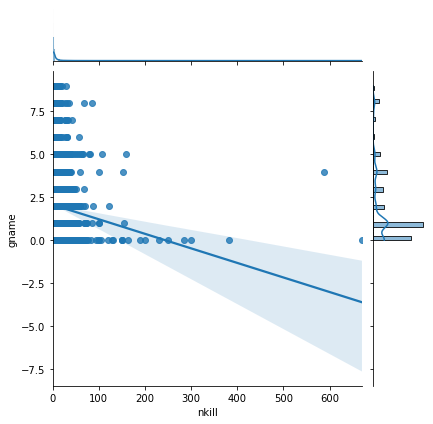

In [81]:
# visualize the correlation between an independent variable and the dependent variable
_ = sns.jointplot(x=baseline_features[15], y='gname', data=df_bl[baseline_features+['gname']], kind="reg")

In [82]:
df_bl[baseline_features[15]].value_counts(sort=True)

0      3256
1      2376
2      1471
3      1010
4       758
       ... 
121       1
105       1
73        1
284       1
383       1
Name: nkill, Length: 104, dtype: int64

#### 16.gname vs. nkillus

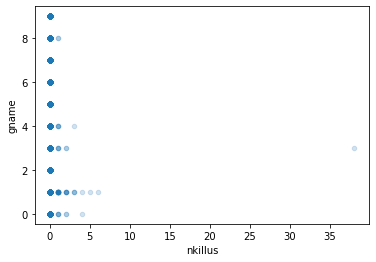

In [83]:
_ = df_bl[baseline_features+['gname']].plot.scatter(baseline_features[16], 'gname',alpha=0.2)

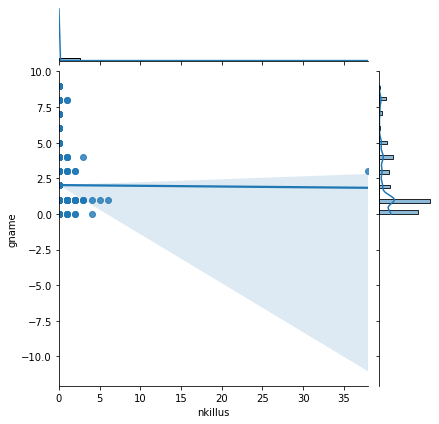

In [84]:
# visualize the correlation between an independent variable and the dependent variable
_ = sns.jointplot(x=baseline_features[16], y='gname', data=df_bl[baseline_features+['gname']], kind="reg")

In [85]:
df_bl[baseline_features[16]].value_counts(sort=True)

0     11931
1        31
2        10
3         4
4         2
38        1
6         1
5         1
Name: nkillus, dtype: int64

#### 17.gname vs. nkillter

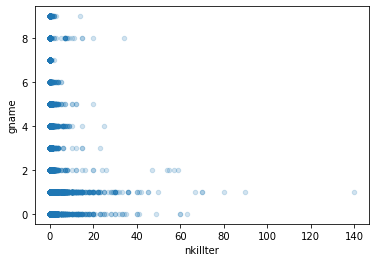

In [86]:
_ = df_bl[baseline_features+['gname']].plot.scatter(baseline_features[17], 'gname',alpha=0.2)

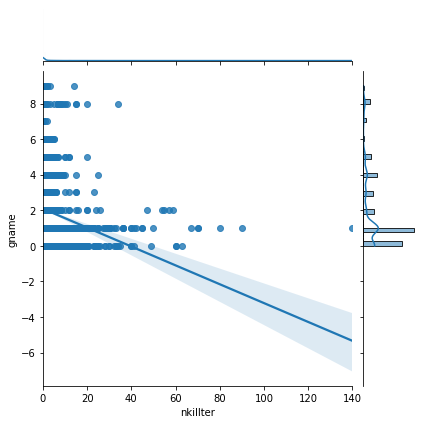

In [87]:
# visualize the correlation between an independent variable and the dependent variable
_ = sns.jointplot(x=baseline_features[17], y='gname', data=df_bl[baseline_features+['gname']], kind="reg")

In [88]:
df_bl[baseline_features[17]].value_counts(sort=True)

0      8803
1      1484
2       459
3       277
4       208
5       140
6       122
7        88
10       62
8        61
9        32
15       30
12       28
13       24
20       19
11       18
14       16
18       13
16        9
30        9
22        7
23        7
25        6
17        5
40        4
36        4
28        4
19        3
33        3
60        2
32        2
21        2
29        2
34        2
26        2
45        2
24        2
70        2
41        2
80        1
49        1
63        1
57        1
42        1
50        1
90        1
27        1
55        1
59        1
67        1
140       1
54        1
31        1
47        1
35        1
Name: nkillter, dtype: int64

#### 18.gname vs. nwound

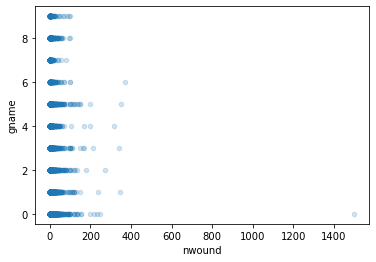

In [89]:
_ = df_bl[baseline_features+['gname']].plot.scatter(baseline_features[18], 'gname',alpha=0.2)

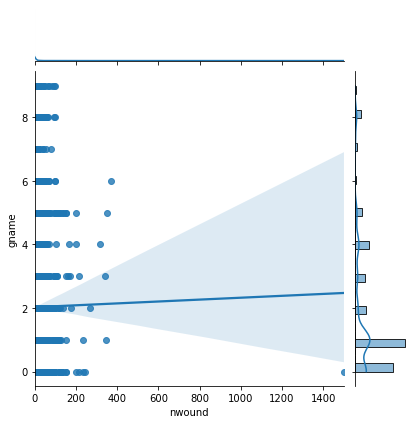

In [90]:
# visualize the correlation between an independent variable and the dependent variable
_ = sns.jointplot(x=baseline_features[18], y='gname', data=df_bl[baseline_features+['gname']], kind="reg")

In [91]:
df_bl[baseline_features[18]].value_counts(sort=True)

0      5542
1       988
2       848
3       736
4       534
       ... 
347       1
68        1
92        1
108       1
235       1
Name: nwound, Length: 136, dtype: int64

#### 19.gname vs. nwoundus

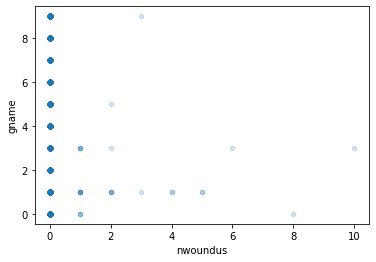

In [92]:
_ = df_bl[baseline_features+['gname']].plot.scatter(baseline_features[19], 'gname',alpha=0.2)

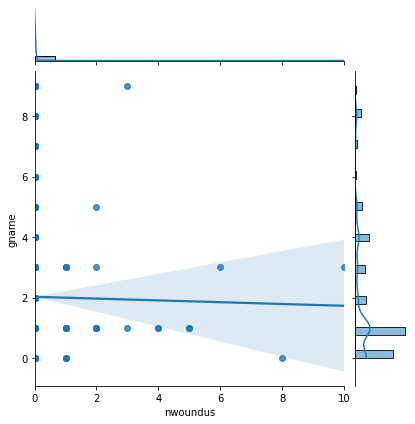

In [93]:
# visualize the correlation between an independent variable and the dependent variable
_ = sns.jointplot(x=baseline_features[19], y='gname', data=df_bl[baseline_features+['gname']], kind="reg")

In [94]:
df_bl[baseline_features[19]].value_counts(sort=True)

0     11953
1        13
2         6
5         2
4         2
3         2
6         1
10        1
8         1
Name: nwoundus, dtype: int64

#### 20.gname vs. nwoundte

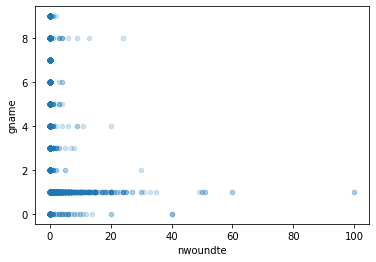

In [95]:
_ = df_bl[baseline_features+['gname']].plot.scatter(baseline_features[20], 'gname',alpha=0.2)

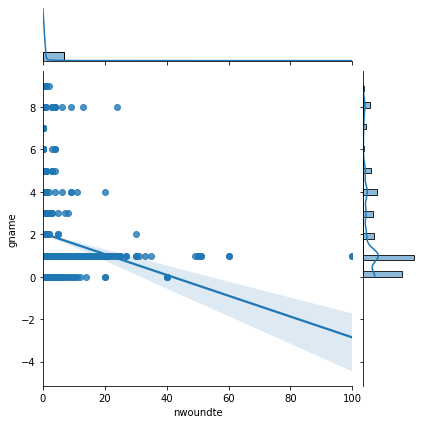

In [96]:
# visualize the correlation between an independent variable and the dependent variable
_ = sns.jointplot(x=baseline_features[20], y='gname', data=df_bl[baseline_features+['gname']], kind="reg")

In [97]:
df_bl[baseline_features[20]].value_counts(sort=True)

0      11173
1        168
2        133
3        105
4         82
6         52
5         46
7         35
10        22
8         21
15        18
9         17
11        15
13        14
20        14
12        10
14         7
24         6
17         6
18         5
25         3
30         3
40         3
16         2
27         2
50         2
19         2
51         2
60         2
100        2
21         2
22         2
49         1
33         1
23         1
35         1
31         1
Name: nwoundte, dtype: int64

#### 21.gname vs. property

(-1.0, 2.0)

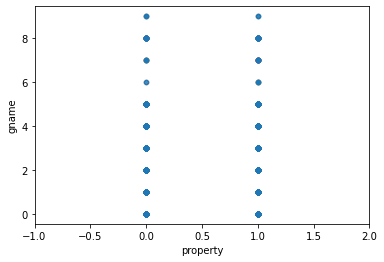

In [98]:
_ = df_bl[baseline_features+['gname']].plot.scatter(baseline_features[21], 'gname',alpha=0.05)
plt.xlim((-1,2))

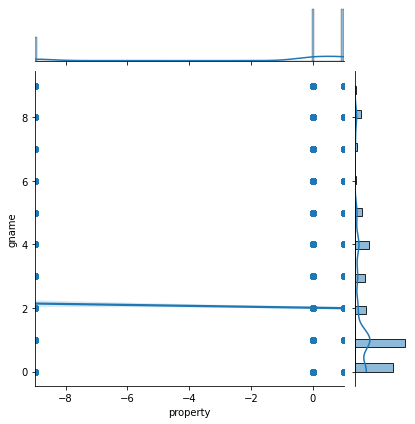

In [99]:
# visualize the correlation between an independent variable and the dependent variable
_ = sns.jointplot(x=baseline_features[21], y='gname', data=df_bl[baseline_features+['gname']], kind="reg")

In [100]:
df_bl[baseline_features[21]].value_counts(sort=True)

 1    4891
 0    4877
-9    2213
Name: property, dtype: int64

#### 22.gname vs. ishostkid

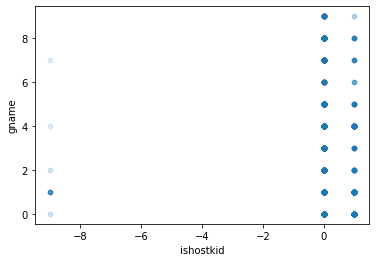

In [101]:
_ = df_bl[baseline_features+['gname']].plot.scatter(baseline_features[22], 'gname',alpha=0.05)

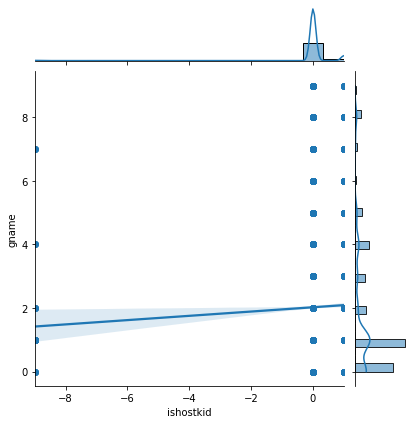

In [102]:
# visualize the correlation between an independent variable and the dependent variable
_ = sns.jointplot(x=baseline_features[22], y='gname', data=df_bl[baseline_features+['gname']], kind="reg")

In [103]:
df_bl[baseline_features[22]].value_counts(sort=True)

 0    10901
 1     1039
-9       41
Name: ishostkid, dtype: int64

#### 23.gname vs. INT_LOG

(-0.5, 1.5)

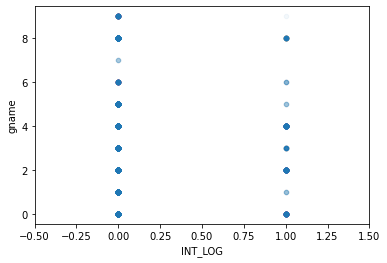

In [105]:
_ = df_bl[baseline_features+['gname']].plot.scatter(baseline_features[23], 'gname',alpha=0.05)
plt.xlim([-0.5, 1.5])

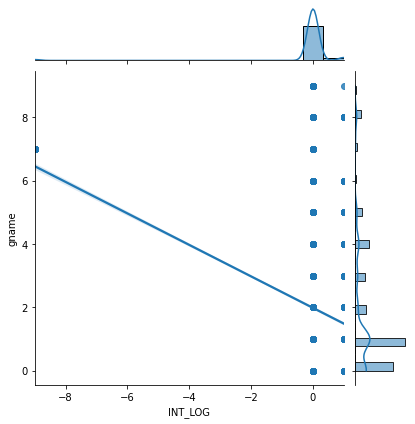

In [107]:
# visualize the correlation between an independent variable and the dependent variable
_ = sns.jointplot(x=baseline_features[23], y='gname', data=df_bl[baseline_features+['gname']], kind="reg")

In [108]:
df_bl[baseline_features[23]].value_counts(sort=True)

 0    11150
 1      634
-9      197
Name: INT_LOG, dtype: int64

#### 24.gname vs. INT_IDEO

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


(-0.5, 1.5)

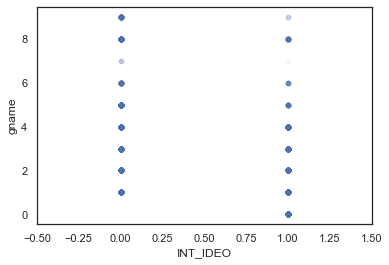

In [49]:
_ = df_bl[baseline_features+['gname']].plot.scatter(baseline_features[24], 'gname',alpha=0.05)
plt.xlim([-0.5, 1.5])

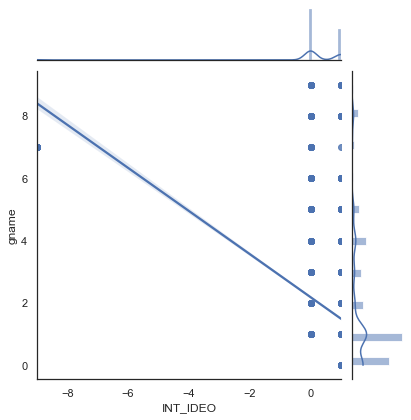

In [106]:
# visualize the correlation between an independent variable and the dependent variable
_ = sns.jointplot(x=baseline_features[24], y='gname', data=df_bl[baseline_features+['gname']], kind="reg")

In [107]:
df_bl[baseline_features[24]].value_counts(sort=True)

 0    7333
 1    4451
-9     197
Name: INT_IDEO, dtype: int64

#### 25.gname vs. INT_MISC

(-0.5, 1.5)

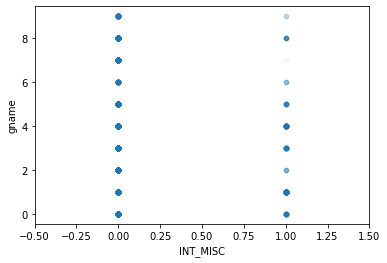

In [109]:
_ = df_bl[baseline_features+['gname']].plot.scatter(baseline_features[25], 'gname',alpha=0.05)
plt.xlim([-0.5, 1.5])

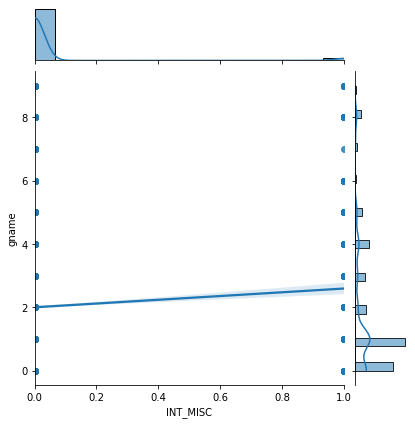

In [110]:
# visualize the correlation between an independent variable and the dependent variable
_ = sns.jointplot(x=baseline_features[25], y='gname', data=df_bl[baseline_features+['gname']], kind="reg")

In [111]:
df_bl[baseline_features[25]].value_counts(sort=True)

0    11432
1      549
Name: INT_MISC, dtype: int64

#### 26.gname vs. INT_ANY

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


(-0.5, 1.5)

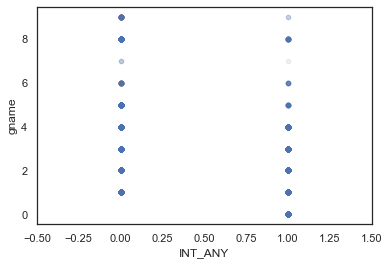

In [116]:
_ = df_bl[baseline_features+['gname']].plot.scatter(baseline_features[26], 'gname',alpha=0.05)
plt.xlim([-0.5, 1.5])

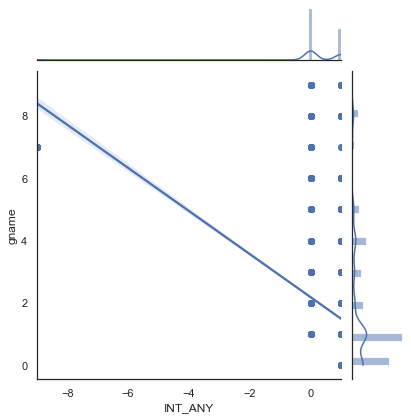

In [117]:
# visualize the correlation between an independent variable and the dependent variable
_ = sns.jointplot(x=baseline_features[26], y='gname', data=df_bl[baseline_features+['gname']], kind="reg")

In [118]:
df_bl[baseline_features[26]].value_counts(sort=True)

 0    7324
 1    4461
-9     196
Name: INT_ANY, dtype: int64